<a href="https://colab.research.google.com/github/park-moonkyu/prophet/blob/main/final_prophet(1216).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

df = pd.read_csv('./final_data.csv')

df=df[['DT','SALE_SUM_AMT']]
df1 = df.sort_values(by='DT' ,ascending=True)
df1=df1[:-41]
test=df1[-52:]
train=df1[:-53]
df1.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
train.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
test.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
test.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
290,2019-01-01 00:00:00,1.296608e+10
101,2019-01-08 00:00:00,1.162013e+10
215,2019-01-15 00:00:00,1.364648e+10
23,2019-01-22 00:00:00,1.510215e+10
142,2019-01-29 00:00:00,1.717471e+10


In [52]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


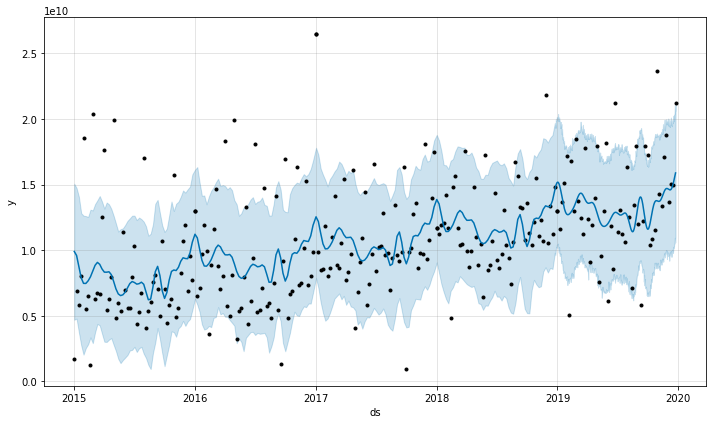

In [64]:
fig = m.plot(forecast)

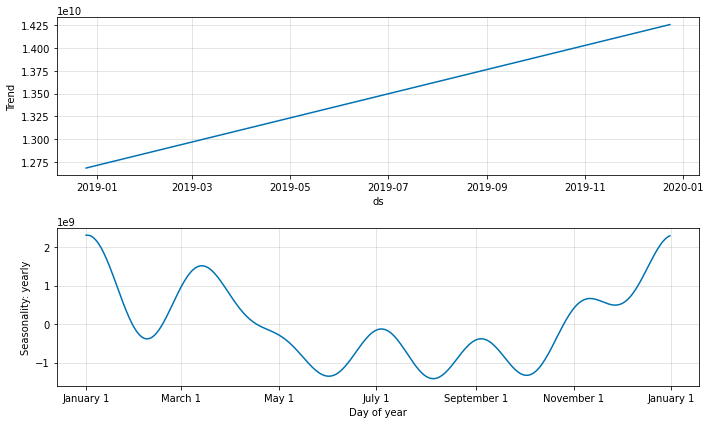

In [40]:
fig_comp = m.plot_components(forecast)


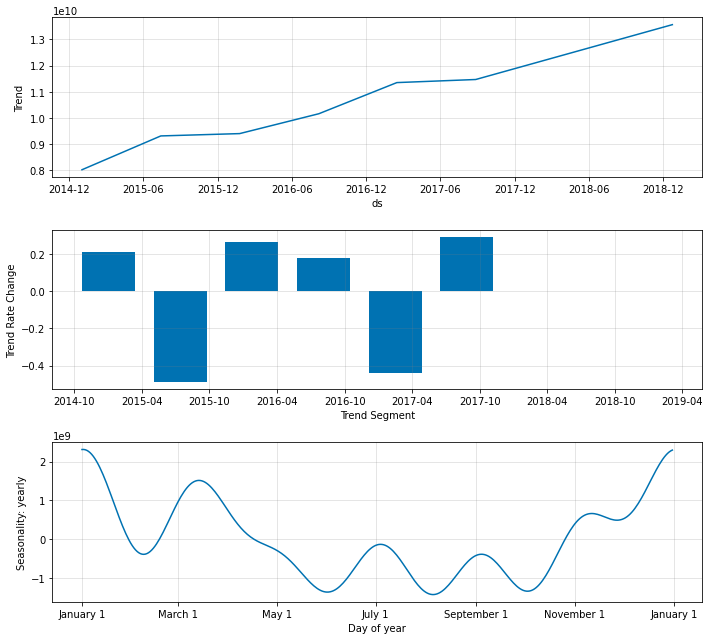

In [41]:
fig_param = m.plot_parameters()

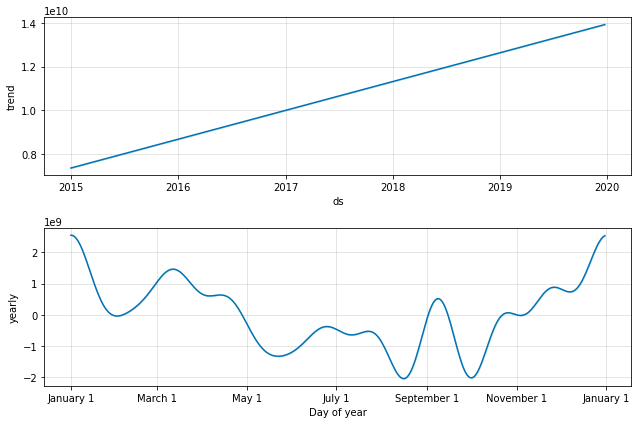

In [56]:
m.plot_components(forecast);

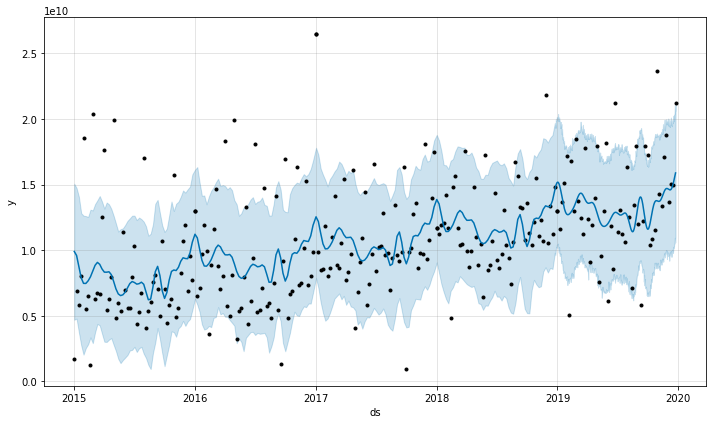

In [65]:
m.plot(forecast);

In [62]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(360)

,ds,yhat,yhat_lower,yhat_upper
213,2018-12-30,1.511186e+10,1.041081e+10,2.013577e+10
214,2018-12-31,1.515130e+10,1.041160e+10,2.006306e+10
215,2019-01-01,1.517434e+10,1.019887e+10,2.010074e+10
216,2019-01-02,1.518045e+10,1.050081e+10,2.016790e+10
217,2019-01-03,1.516942e+10,1.026026e+10,2.037041e+10
...,...,...,...,...
568,2019-12-20,1.540570e+10,1.043991e+10,2.032091e+10
569,2019-12-21,1.552570e+10,1.048577e+10,2.040663e+10
570,2019-12-22,1.564711e+10,1.094429e+10,2.107511e+10
571,2019-12-23,1.576781e+10,1.058425e+10,2.059718e+10


In [49]:
# or evaluate while training
m = NeuralProphet()
metrics = m.fit(df1, validate_each_epoch=True, valid_p=0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO:NP.config:Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150
INFO:NP.config:Auto-set epochs to 150
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning:

Setting attributes on ParameterDict is not supported.



Setting attributes on ParameterDict is not supported.




INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.87E-01
INFO:NP.forecaster:learning rate range test found optimal lr: 1.87E-01
Epoch[150/150]: 100%|██████████| 150/150 [00:08<00:00, 17.30it/s, SmoothL1Loss=0.0224, MAE=2.9e+9, RegLoss=0, MAE_val=2.98e+9, SmoothL1Loss_val=0.0211]
